# EDA and Data Visualization

While a more robust dashboard will be built in Tableau, we want to continue exploring data while visualizing relationships between features here in Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# bringing back in data frames ff_all and ff_collective

ff_all = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_all_position_pts.csv", index_col = 0)
ff_collective = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_all_collective_seasons.csv", index_col = 0)

### Scoring and positions as a whole

In [8]:
pd.set_option('display.max_columns', None)
ff_collective.head()

,team,player_name,position,player_id_x,height,weight,years_exp,player,tm,pos,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,season,rookie_year,pts/g,gp,cmp,team_abb,player_id_y,qbr_total,pts_added,qb_plays,epa_total,pass,run,exp_sack,qbr_raw,sack,name_display,player_display_name,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,completions,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,rush_attempts,rush_yards,expected_rush_yards,rush_yards_over_expected,avg_rush_yards,rush_yards_over_expected_per_att,rush_pct_over_expected,rush_touchdowns,avg_cushion,avg_separation,percent_share_of_intended_air_yards,receptions,targets,catch_percentage,yards,rec_touchdowns,avg_yac,avg_expected_yac,avg_yac_above_expectation,home_team,tm.1,1std,totyd,passy,rushy,to,offense,defense,sp. tms,name,abbreviation,pct_gs,avg_per_rush,avg_per_catch,avg_per_tgt,ttl_touch,ttl_opp,ttl_opp_per_game,yds_per_opp,td_per_opp,turnover_per_opp,fp_per_opp,fp_per_gm,fantasypoints_hppr,fp_per_game_hppr
0,ARI,Brett Hundley,QB,00-0031589,75.0,226.0,4.0,Brett Hundley,ARI,QB,26.0,3.0,0.0,0.0,0.0,49.0,0.0,11.0,41.0,0.0,7.0,0.0,0.0,6.06,0.0,0.0,0.0,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arizona Cardinals,22.5625,19.625,341.6875,217.3125,124.375,2.0,4.0225,-10.846875,1.240625,Arizona Cardinals,ARI,0.000000,5.857143,NaN,NaN,7.0,18.0,6.000000,5.000000,0.000000,0.000000,0.336667,2.020000,6.06,2.020000
1,ARI,Kyler Murray,QB,00-0035228,70.0,207.0,0.0,Kyler Murray,ARI,QB,22.0,16.0,16.0,0.0,0.0,3722.0,20.0,542.0,544.0,4.0,93.0,0.0,0.0,279.28,12.0,5.0,2.0,2019,NaN,NaN,NaN,NaN,ARI,3917315.0,57.7,16.2,709.0,71.6,37.3,13.4,0.0,58.0,-17.8,Kyler Murray,Kyler Murray,2.733681,4.914236,6.850385,-1.936149,13.732432,38.64734,-2.111357,63.764706,437.882353,2.352941,1.411765,88.714455,41.058824,65.018637,66.836301,-1.817664,20.623331,45.849949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arizona Cardinals,22.5625,19.625,341.6875,217.3125,124.375,2.0,4.0225,-10.846875,1.240625,Arizona Cardinals,ARI,1.000000,5.849462,NaN,NaN,93.0,635.0,39.687500,6.718110,0.037795,0.026772,0.439811,17.455000,279.28,17.455000
2,ARI,Alfred Morris,RB,00-0029141,70.0,222.0,7.0,Alfred Morris,ARI,RB,31.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.40,0.0,0.0,0.0,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arizona Cardinals,22.5625,19.625,341.6875,217.3125,124.375,2.0,4.0225,-10.846875,1.240625,Arizona Cardinals,ARI,0.000000,4.000000,NaN,NaN,1.0,1.0,1.000000,4.000000,0.000000,0.000000,0.400000,0.400000,0.40,0.400000
3,ARI,David Johnson,RB,00-0032187,73.0,224.0,4.0,David Johnson,ARI,RB,28.0,13.0,9.0,47.0,36.0,0.0,0.0,0.0,345.0,2.0,94.0,370.0,4.0,141.50,0.0,1.0,1.0,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arizona Cardinals,22.5625,19.625,341.6875,217.3125,124.375,2.0,4.0225,-10.846875,1.240625,Arizona Cardinals,ARI,0.692308,3.670213,10.277778,7.872340,130.0,141.0,10.846154,5.070922,0.042553,0.007092,1.003546,10.884615,159.50,12.269231
4,ARI,Kenyan Drake,RB,00-0033118,73.0,211.0,3.0,Kenyan Drake,2TM,RB,25

In [ ]:
plt.scatter

### Each position

In [14]:
# split up by position


ff_rb = ff_all.loc[(ff_all['pos'] == 'RB') | (ff_all['pos_20'] == 'RB') | 
                   (ff_all['pos_19'] == 'RB') | (ff_all['pos_22'] == 'RB')]
ff_wr = ff_all.loc[(ff_all['pos'] == 'WR') | (ff_all['pos_20'] == 'WR') | 
                   (ff_all['pos_19'] == 'WR') | (ff_all['pos_22'] == 'WR')]
ff_qb = ff_all.loc[(ff_all['pos'] == 'QB') | (ff_all['pos_20'] == 'QB') | 
                   (ff_all['pos_19'] == 'QB') | (ff_all['pos_22'] == 'QB')]
ff_te = ff_all.loc[(ff_all['pos'] == 'TE') | (ff_all['pos_20'] == 'TE') | 
                   (ff_all['pos_19'] == 'TE') | (ff_all['pos_22'] == 'TE')]

In [32]:
ff_qb.head()

,team_19,player_name_19,position_19,player_id_x,height_19,weight_19,years_exp_19,tm_19,pos_19,age_19,g_19,gs_19,tgt_19,rec_19,passingyds_19,passingtd_19,passingatt_19,rushingyds_19,rushingtd_19,rushingatt_19,receivingyds_19,receivingtd_19,fantasypoints_19,int_19,fumbles_19,fumbleslost_19,team_20,player_name_20,position_20,height_20,weight_20,years_exp_20,tm_20,pos_20,age_20,g_20,gs_20,tgt_20,rec_20,passingyds_20,passingtd_20,passingatt_20,rushingyds_20,rushingtd_20,rushingatt_20,receivingyds_20,receivingtd_20,fantasypoints_20,int_20,fumbles_20,fumbleslost_20,team,player_name_x,position,height,weight,years_exp,rookie_year,tm,pos,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,team_22,player_name_22,position_22,height_22,weight_22,years_exp_22,rookie_year_22,tm_22,pos_22,fantasypoints_22,pts/g,gp,cmp,passingyds_22,passingtd_22,int_22,rushingatt_22,rushingyds_22,rushingtd_22,fumbles_22,tgt_22,rec_22,receivingyds_22,receivingtd_22,season_19_x,player_display_name,avg_time_to_throw_19,avg_completed_air_yards_19,avg_intended_air_yards_19,avg_air_yards_differential_19,aggressiveness_19,max_completed_air_distance_19,avg_air_yards_to_sticks_19,attempts_19,pass_yards_19,pass_touchdowns_19,interceptions_19,passer_rating_19,completions_19,completion_percentage_19,expected_completion_percentage_19,completion_percentage_above_expectation_19,avg_air_distance_19,max_air_distance_19,season_20_x,avg_time_to_throw_20,avg_completed_air_yards_20,avg_intended_air_yards_20,avg_air_yards_differential_20,aggressiveness_20,max_completed_air_distance_20,avg_air_yards_to_sticks_20,attempts_20,pass_yards_20,pass_touchdowns_20,interceptions_20,passer_rating_20,completions_20,completion_percentage_20,expected_completion_percentage_20,completion_percentage_above_expectation_20,avg_air_distance_20,max_air_distance_20,season_x,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,completions,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,season_22_x,avg_time_to_throw_22,avg_completed_air_yards_22,avg_intended_air_yards_22,avg_air_yards_differential_22,aggressiveness_22,max_completed_air_distance_22,avg_air_yards_to_sticks_22,attempts_22,pass_yards_22,pass_touchdowns_22,interceptions_22,passer_rating_22,completions_22,completion_percentage_22,expected_completion_percentage_22,completion_percentage_above_expectation_22,avg_air_distance_22,max_air_distance_22,player_gsis_id,efficiency_19,percent_attempts_gte_eight_defenders_19,avg_time_to_los_19,rush_attempts_19,rush_yards_19,expected_rush_yards_19,rush_yards_over_expected_19,avg_rush_yards_19,rush_yards_over_expected_per_att_19,rush_pct_over_expected_19,rush_touchdowns_19,efficiency_20,percent_attempts_gte_eight_defenders_20,avg_time_to_los_20,rush_attempts_20,rush_yards_20,expected_rush_yards_20,rush_yards_over_expected_20,avg_rush_yards_20,rush_yards_over_expected_per_att_20,rush_pct_over_expected_20,rush_touchdowns_20,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,rush_attempts,rush_yards,expected_rush_yards,rush_yards_over_expected,avg_rush_yards,rush_yards_over_expected_per_att,rush_pct_over_expected,rush_touchdowns,efficiency_22,percent_attempts_gte_eight_defenders_22,avg_time_to_los_22,rush_attempts_22,rush_yards_22,expected_rush_yards_22,rush_yards_over_expected_22,avg_rush_yards_22,rush_yards_over_expected_per_att_22,rush_pct_over_expected_22,rush_touchdowns_22,avg_cushion_19,avg_separation_19,percent_share_of_intended_air_yards_19,receptions_19,targets_19,catch_percentage_19,yards_19,rec_touchdowns_19,avg_yac_19,avg_expected_yac_19,avg_yac_above_expectation_19,avg_cushion_20,avg_separation_20,percent_share_of_intended_air_yards_20,receptions_20,targ

### QBs

Text(0, 0.5, 'QB Fantasy points per game current season (2021)')

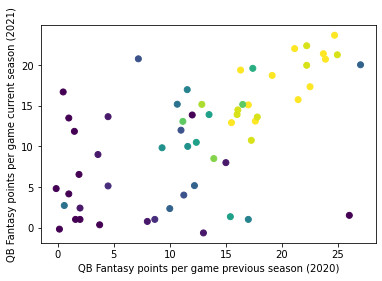

In [17]:
plt.scatter(ff_qb['fp_per_gm20'], ff_qb['fp_per_gm21'], c = ff_qb['gs_20'])
# plt.legend(handles =ff_qb_pts['GS_20'] , loc=2) ## Need to figure out how to add a good legend in
plt.xlabel('QB Fantasy points per game previous season (2020)')
plt.ylabel('QB Fantasy points per game current season (2021)')

Text(0, 0.5, 'QB Fantasy points per game current season (2021)')

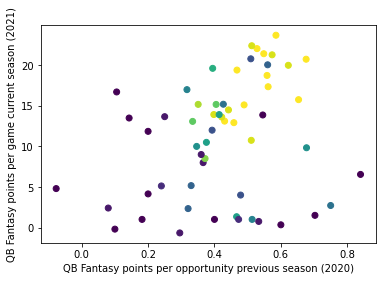

In [20]:
plt.scatter(ff_qb['fp_per_opp20'], ff_qb['fp_per_gm21'], c = ff_qb['gs_20'])
plt.xlabel('QB Fantasy points per opportunity previous season (2020)')
plt.ylabel('QB Fantasy points per game current season (2021)')

Text(0, 0.5, 'QB Fantasy points in previous season (2020)')

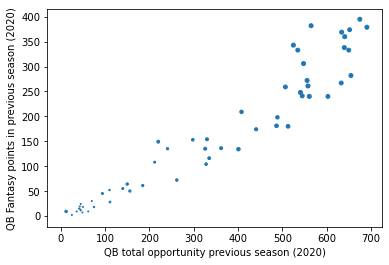

In [23]:
plt.scatter(ff_qb['ttl_opp20'], ff_qb['fantasypoints_20'], ff_qb['gs_20'])
plt.xlabel('QB total opportunity previous season (2020)')
plt.ylabel('QB Fantasy points in previous season (2020)')

Text(0, 0.5, 'QB Fantasy points (2020)')

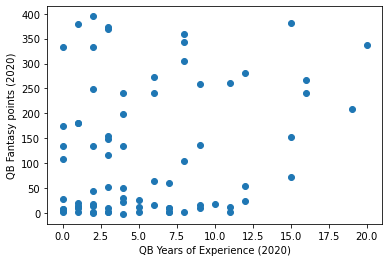

In [26]:
plt.scatter(ff_qb['years_exp_20'], ff_qb['fantasypoints_20'] )
plt.xlabel('QB Years of Experience (2020)')
plt.ylabel('QB Fantasy points (2020)')

<AxesSubplot:>

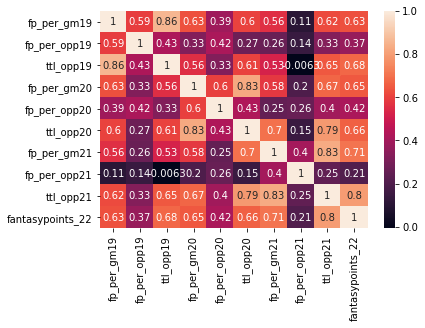

In [34]:
sns.heatmap(ff_qb[['fp_per_gm19', 'fp_per_opp19',  'ttl_opp19','fp_per_gm20', 'fp_per_opp20', 'ttl_opp20',
                       'fp_per_gm21', 'fp_per_opp21', 'ttl_opp21', 'fantasypoints_22']].corr(), annot = True)

For QBs, past success seems to be indicitive of future success - even scores from 3 years ago all give a moderately high correlation to total points. Opportunities and points per game all are fairly high.

In [36]:
ff_qb.head()

,team_19,player_name_19,position_19,player_id_x,height_19,weight_19,years_exp_19,tm_19,pos_19,age_19,g_19,gs_19,tgt_19,rec_19,passingyds_19,passingtd_19,passingatt_19,rushingyds_19,rushingtd_19,rushingatt_19,receivingyds_19,receivingtd_19,fantasypoints_19,int_19,fumbles_19,fumbleslost_19,team_20,player_name_20,position_20,height_20,weight_20,years_exp_20,tm_20,pos_20,age_20,g_20,gs_20,tgt_20,rec_20,passingyds_20,passingtd_20,passingatt_20,rushingyds_20,rushingtd_20,rushingatt_20,receivingyds_20,receivingtd_20,fantasypoints_20,int_20,fumbles_20,fumbleslost_20,team,player_name_x,position,height,weight,years_exp,rookie_year,tm,pos,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,team_22,player_name_22,position_22,height_22,weight_22,years_exp_22,rookie_year_22,tm_22,pos_22,fantasypoints_22,pts/g,gp,cmp,passingyds_22,passingtd_22,int_22,rushingatt_22,rushingyds_22,rushingtd_22,fumbles_22,tgt_22,rec_22,receivingyds_22,receivingtd_22,season_19_x,player_display_name,avg_time_to_throw_19,avg_completed_air_yards_19,avg_intended_air_yards_19,avg_air_yards_differential_19,aggressiveness_19,max_completed_air_distance_19,avg_air_yards_to_sticks_19,attempts_19,pass_yards_19,pass_touchdowns_19,interceptions_19,passer_rating_19,completions_19,completion_percentage_19,expected_completion_percentage_19,completion_percentage_above_expectation_19,avg_air_distance_19,max_air_distance_19,season_20_x,avg_time_to_throw_20,avg_completed_air_yards_20,avg_intended_air_yards_20,avg_air_yards_differential_20,aggressiveness_20,max_completed_air_distance_20,avg_air_yards_to_sticks_20,attempts_20,pass_yards_20,pass_touchdowns_20,interceptions_20,passer_rating_20,completions_20,completion_percentage_20,expected_completion_percentage_20,completion_percentage_above_expectation_20,avg_air_distance_20,max_air_distance_20,season_x,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,completions,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,season_22_x,avg_time_to_throw_22,avg_completed_air_yards_22,avg_intended_air_yards_22,avg_air_yards_differential_22,aggressiveness_22,max_completed_air_distance_22,avg_air_yards_to_sticks_22,attempts_22,pass_yards_22,pass_touchdowns_22,interceptions_22,passer_rating_22,completions_22,completion_percentage_22,expected_completion_percentage_22,completion_percentage_above_expectation_22,avg_air_distance_22,max_air_distance_22,player_gsis_id,efficiency_19,percent_attempts_gte_eight_defenders_19,avg_time_to_los_19,rush_attempts_19,rush_yards_19,expected_rush_yards_19,rush_yards_over_expected_19,avg_rush_yards_19,rush_yards_over_expected_per_att_19,rush_pct_over_expected_19,rush_touchdowns_19,efficiency_20,percent_attempts_gte_eight_defenders_20,avg_time_to_los_20,rush_attempts_20,rush_yards_20,expected_rush_yards_20,rush_yards_over_expected_20,avg_rush_yards_20,rush_yards_over_expected_per_att_20,rush_pct_over_expected_20,rush_touchdowns_20,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,rush_attempts,rush_yards,expected_rush_yards,rush_yards_over_expected,avg_rush_yards,rush_yards_over_expected_per_att,rush_pct_over_expected,rush_touchdowns,efficiency_22,percent_attempts_gte_eight_defenders_22,avg_time_to_los_22,rush_attempts_22,rush_yards_22,expected_rush_yards_22,rush_yards_over_expected_22,avg_rush_yards_22,rush_yards_over_expected_per_att_22,rush_pct_over_expected_22,rush_touchdowns_22,avg_cushion_19,avg_separation_19,percent_share_of_intended_air_yards_19,receptions_19,targets_19,catch_percentage_19,yards_19,rec_touchdowns_19,avg_yac_19,avg_expected_yac_19,avg_yac_above_expectation_19,avg_cushion_20,avg_separation_20,percent_share_of_intended_air_yards_20,receptions_20,targ

Text(0, 0.5, 'QB Fantasy points per game current season (2021)')

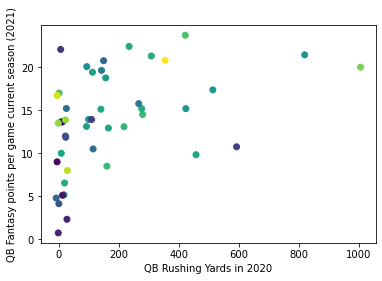

In [39]:
plt.scatter(ff_qb['rushingyds_20'], ff_qb['fp_per_gm21'], c = ff_qb['avg_time_to_throw'])
plt.xlabel('QB Rushing Yards in 2020')
plt.ylabel('QB Fantasy points per game current season (2021)')